# Generative Adversarial Networks (GANs)

## Recall Generative Models

Suppose we have two tasks on a dataset of tweets. 

We can categorize models to two categories 
1. Generative Model: Just generating new stuff
2. Discriminative Model: Discriminate/classify/categorize between data samples. 

1. Identify if a tweet is real or fake 
- This task is SUPERVISED! Requires a **discriminative model** 
- The model learns to approximate **p(y|x)**, conditional probability of **classes given input data**. If you recall, we are using Cross-Entropy over the softmax. The softmax gives you some probability based on the input data. 
2. Generate a new tweet 
- This task is **unsupervised**, and requires a generative model. 
- The model learns to approximate p(x)/data distribution. There is NO CONDITIONAL PROBABILITY. It just learns the probability distribution over the input data. 

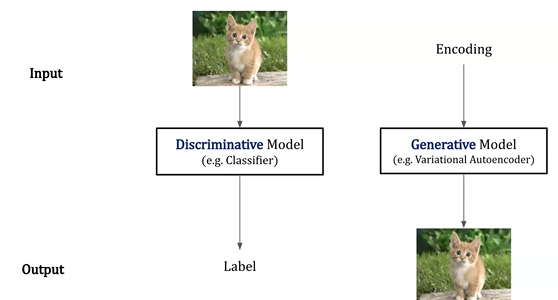

## Generative Learning 

An **unsupervised learning task**. 

### Loss Function 
This is an **auxiliary task** that we know the answer to. 

There is no ground truth with respect to the actual task that we want to accomplish. We are learning the **structure & distribution of data** rather than labels for data! 

## Categories of Generative Models 

### Unconditional (E.g. VAEs, Autoregressive RNNs) 
- Random noise or a fixed token as input;
- NO CONTROL over what category they generate 

But preferably we want control over the category the model generates. 

### Conditional 
- One-hot encoding of the target category + random noise 
- An embedding generated by another model (e.g. from CNN)
- User have **high-control** over what the model will generate

## Types of Generative Models 

There are different families of generative models 
- Autoregressive 
- VAEs 
- GANs 
- Flow-based generative models 
- Diffusion Models 




## Problems with VAEs 

Vanilla VAEs generate blurry image with blurry backgrounds. 

This is because, to **minimize the MSE Loss**, the autoencoders predict the average pixel. 

Let's say you train a VAE on just faces. If you collect many images of faces, some are tilted left, tilted right, up down, etc. 

But the model tries to minimize the loss across all these images! It'll be some superposition of all the orientations of the face, and it'll try to learn this superimposed pattern. 

## GANs: Solving the Averaging problem 

The idea is to **train two models**

1. Generator Model 
- Try to **fool the discriminator** by generating real-looking images 
2. Discriminator Model
- Try to distinguish between **real and fake** images. 

Try to **LEARN THE LOSS FUNCTION OF THE GENERATIVE MODEL**. 

The loss function of the generator is defined by the discriminator! 

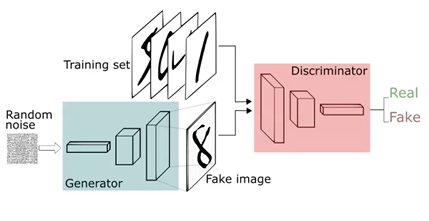

The classifier sees if the image is from a similar distribution as the input data. 

## Classifier 

Receives images from GENERATOR, as well as from training data.

Now which image is real? Which image is fake? 

## Training this network 

At the start, the generator is very bad. It just generates random images. 

You sample some images from the generator and some from the training data, then send them to the discriminator. You then train your discriminator, then freeze it. 

Then, based on the performance of the discriminator, go back and train the generator, then freeze it. 

The goal is so that the discriminator **cannot** classify between real or fake. This obviously means the discrimintaor CAN'T BE WEAK!

### Zero-sum Game 
If one wins, the other loses for sure. 

Ideally we want the generator to win! This is the whole process. 

### Generator Network 
Input --> A noise vector 

Output --> Generated Image

Set to make the discriminator as wrong as possible

### Discriminator Network 
Input --> Image 

Output --> Real or fake

This will do the best job it can to catch the generator. 

The generator will need to lose if the discriminator becomes strong. 

### Loss Function for MinMax Game

Learn discriminator weights to **maximize the probability** that it labels a real image as real, and a generated image as fake. 

What loss function should we use? **Binary Cross-Entropy**, it's just a binary classification problem. 

Now, what is the loss function of the Generator? The **Discriminator**. You are learning this classifier that becomes the loss function of the generator. 

If the discriminator is performing WELL, the generator is NOT performing well. 



## The Generator Training Trick 

If Discriminator has a low loss --> Generator has a high loss 

and vice versa. 

Generator tries to **increase** the loss of the discriminator; we are trying to MAXIMIZE IT! 

This is now Gradient **Ascent**! 

You don't need to do anything fancy! From the POV of the generator, just say the ground truth label is 0 (real) even though the output is synthetically generated! 

## Problems of Training GANs 

1. Vanishing Gradients 

This happens a lot if one becomes too much stronger than the other. If the discriminator is too good, then the generator WILL NOT LEARN! 

Remember that we are using the discrimiantor as a **loss function** for the generator. 

If the discriminator is too good, small changes in generator weights **won't change the discriminator output** 

If small changes in generator weights make no difference, then we can't incrementally improve the generator 

2. Mode Collapse 
Stuck at local optimum. 

If the generator starts producing the **same output**, the best strategy for the discriminator is to **reject that output**. 

If the discriminator is stuck in a **local optimum**, it cannot adapt to the generator! If the discriminator is bad at "1", the generator will just generate 1 to minize the loss. 

3. Difficulty with Convergence 

Due to the MinMax optimization process, training Vanilla GANs is **very difficult**. It is difficult to numerically see whether there is progress! 

- LeakyReLU 
- Batch Norm 
- Regularize Discriminator Weights & Adding noise to discriminator inputs

## GAN Applications 

1. Grayscale to Color 

- Convert to grayscale 
- Conditional Generator back to color (This is NOT passing noise!)
- Use Discriminator the same way!

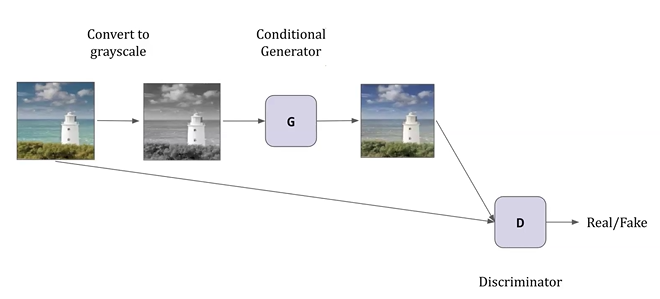

2. Conditional Generation 

How could we have a GAN trained on MNIST output only specific digits? 

During training: 
- Pass 1-hot encoding of class to BOTH generator and discriminator 
 This is such that the generator is **learning conditionally**. 

3. Style Transfer 

Cycle GAN: Cycle loss is reconstruction loss between input to cyclegan to output of cyclegan to ensure consistency.

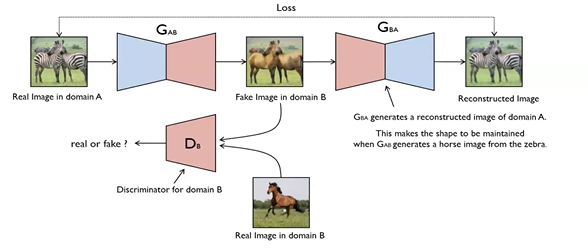

Take zebras, replace with horses. 

But the catch is that, nothing will push the generator to keep everything else the same! 

The fake horse image is passed into another autoencoder, and reconstruct back the input original zebra image. 

The idea is for the background and things to be similar. The reconstruction loss is done to ensure the background is consistent with the original image! If the horse image is terrible (doesn't preserve background), then it's difficult to reconstruct it back into zebras!